In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Tanggal                145460 non-null  object 
 1   Lokasi                 145460 non-null  object 
 2   SuhuMin                145460 non-null  float64
 3   SuhuMax                145460 non-null  float64
 4   CurahHujan             145460 non-null  float64
 5   Penguapan              145460 non-null  float64
 6   SinarMatahari          145460 non-null  float64
 7   ArahAnginKencang       145460 non-null  object 
 8   KecepatanAnginKencang  145460 non-null  float64
 9   ArahAnginJam9          145460 non-null  object 
 10  ArahAnginJam3          145460 non-null  object 
 11  KecepatanAnginJam9     145460 non-null  float64
 12  KecepatanAnginJam3     145460 non-null  float64
 13  KelembabanJam9         145460 non-null  float64
 14  KelembabanJam3         145460 non-nu

,SuhuMin,SuhuMax,CurahHujan,Penguapan,SinarMatahari,KecepatanAnginKencang,KecepatanAnginJam9,KecepatanAnginJam3,KelembabanJam9,KelembabanJam3,TekananUdaraJam9,TekananUdaraJam3,AwanJam9,AwanJam3,SuhuJam9,SuhuJam3
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.193993,23.221337,2.360898,5.468995,7.610612,40.035567,14.043384,18.662601,68.880816,51.539143,1017.649946,1015.256314,4.448437,4.509959,16.990624,21.683306
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265605,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.610000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.470000,7.610000,39.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.470000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [3]:
# Memeriksa apakah ada nilai dalam dataset yang "kosong" atau "NaN"
print(data.isnull().values.any())
#Apabila ingin melakukan pemeriksaan data isnull perkolom gunakan script berikut:
print(data.isnull().sum())

False
Tanggal                  0
Lokasi                   0
SuhuMin                  0
SuhuMax                  0
CurahHujan               0
Penguapan                0
SinarMatahari            0
ArahAnginKencang         0
KecepatanAnginKencang    0
ArahAnginJam9            0
ArahAnginJam3            0
KecepatanAnginJam9       0
KecepatanAnginJam3       0
KelembabanJam9           0
KelembabanJam3           0
TekananUdaraJam9         0
TekananUdaraJam3         0
AwanJam9                 0
AwanJam3                 0
SuhuJam9                 0
SuhuJam3                 0
HujanHariIni             0
HujanBesok               0
dtype: int64


In [4]:
data = data.fillna(data.mean(numeric_only=True))
print(data.isnull().sum())

Tanggal                  0
Lokasi                   0
SuhuMin                  0
SuhuMax                  0
CurahHujan               0
Penguapan                0
SinarMatahari            0
ArahAnginKencang         0
KecepatanAnginKencang    0
ArahAnginJam9            0
ArahAnginJam3            0
KecepatanAnginJam9       0
KecepatanAnginJam3       0
KelembabanJam9           0
KelembabanJam3           0
TekananUdaraJam9         0
TekananUdaraJam3         0
AwanJam9                 0
AwanJam3                 0
SuhuJam9                 0
SuhuJam3                 0
HujanHariIni             0
HujanBesok               0
dtype: int64


In [7]:
# Memilih fitur (features) dan target
features = ['SuhuMin', 'SuhuMax', 'CurahHujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginKencang', 'KelembabanJam9', 'KelembabanJam3']
X = data[features]
y = data['HujanBesok']
# Membuat label encoding untuk RainTomorrow karena merupakan string 'Yes'/'No'
y_encoded = y.map({'No': 0, 'Yes': 1})
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
y_binned = discretizer.fit_transform(y_encoded.values.reshape(-1, 1)).flatten()
print("Data target setelah diskritisasi:")
#untuk mengetahui nilai nilai uniqe hasil diskrit
unique_values = set(y_binned)
print("Nilai unik dari y_binned:", unique_values)
#untuk mengetahui nilai detail hasil diskrit
for bin_idx in range(2):
    bin_mask = (y_binned == bin_idx)
    print(f"Bin {bin_idx}: {y[bin_mask]}")

Data target setelah diskritisasi:
Nilai unik dari y_binned: {np.float64(0.0)}
Bin 0: 0          No
1          No
2         Yes
3         Yes
4         Yes
         ... 
145455     No
145456     No
145457     No
145458     No
145459     No
Name: HujanBesok, Length: 145460, dtype: object
Bin 1: Series([], Name: HujanBesok, dtype: object)


c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [8]:
 # Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, 
y_binned, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (116368, 8)
Shape of X_test: (29092, 8)
Shape of Y_train: (116368,)
Shape of Y_test: (29092,)


In [9]:
# Menghitung baseline performance (prediksi kelas mayoritas)
# Mencari kelas mayoritas
y_train = y_train.astype(int)
#konversi nilai data agar dapat dihitung kelas dengan populasi terbanyak
majority_class = np.bincount(y_train).argmax()
# Prediksi kelas mayoritas pada testing set
y_pred_baseline = np.full_like(y_test, majority_class)


In [10]:
# Inisialisasi model
model = DecisionTreeClassifier(random_state=42)
# Latih model menggunakan data latih
model.fit(X_train, y_train)
# Buat prediksi menggunakan data uji
y_pred = model.predict(X_test)

In [11]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
labels = ['No Rain', 'Rain']
# Menghitung akurasi baseline
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy:", baseline_accuracy,"\n")
print("Decicion Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision, "\n")
# Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Baseline Accuracy: 1.0 

Decicion Tree Accuracy: 1.0
Decision Tree Precision: 1.0 

Confusion Matrix:
[[29092]]


c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


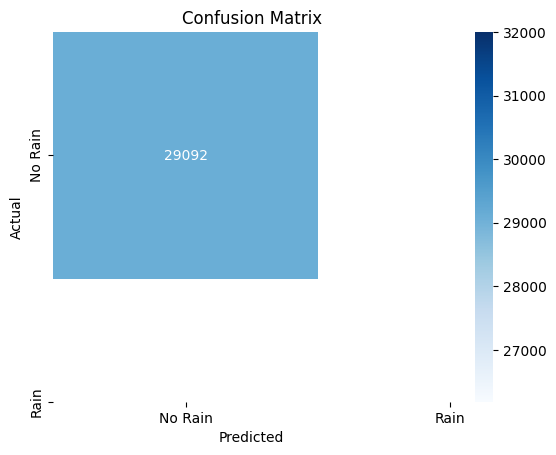

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29092

    accuracy                           1.00     29092
   macro avg       1.00      1.00      1.00     29092
weighted avg       1.00      1.00      1.00     29092



In [12]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Tampilkan classification report
print(classification_report(y_test, y_pred))
